# TKT4108 Structural Dynamics 2

## Solution exercise 7

**Main topics:**  State-space models in structural dynamics

**References:** Github examples, lecture notes


### Problem 1: Shear frame

**a)**

The stiffness matrix $\mathbf{K}$ can be obtained by sequentially setting each DOF to a unity value, and then considering the forces in each DOF: 

$$
\mathbf{K}  = \begin{bmatrix}
2k_1 + 2k_2 & -2k_2 & 0 \\
-2k_2 & 2k_2 + 2k_3 & -2k_3 \\
0 & -2k_3 & 2k_3
\end{bmatrix}
$$

The mass matrix is diagonal since the floor masses are lumped into each DOF:

$$
\mathbf{M}  = \text{diag}(m_1, m_2, m_3)
$$

We start by calculating the modal properties.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import scipy
import sys
sys.path.append('./../../modules')
from time_integration import * # Import all functions in the module time_integration

# Define structural properties
m1=5.0
m2=4.0
m3=4.0

k1=1.5e3
k2=1.0e3
k3=1.0e3

K = np.array(([[2*k1+2*k2, -2*k2,0],
                [-2*k2, 2*k2+2*k3,-2*k3],
                [0, -2*k3,2*k3]])) # Stiffness matrix

M = np.diag([m1,m2,m3]) # Mass matrix

lam,v = spla.eig(K,M) # Solve undamped eigenvalue problem using scipy 

mgen=v.T @ M @ v # Generalized masses (before normalization)

Phi=np.zeros_like(v)
for k in np.arange(3):
    Phi[:,k]=v[:,k]/np.sqrt(mgen[k,k]) # Mass normalize eigenvectors

omega_n = np.real(lam)**0.5 #Natural frequencies in rad/s

idx_sort=np.argsort(omega_n) # Find sorting order (smallest to biggest frequency)

omega_n=omega_n[idx_sort] # Rearrange frequencies
Phi=Phi[:,idx_sort] # Rearrange modes

print('Natural frequencies in rad/s:')
print(omega_n)

print(' ' )

print('Mode shapes:')
print(Phi)


Natural frequencies in rad/s:
[10.87504704 28.35085542 39.72357422]
 
Mode shapes:
[[ 0.13155433  0.34157989  0.25693703]
 [ 0.2899896   0.1675697  -0.37124982]
 [ 0.37983267 -0.27581582  0.17219981]]


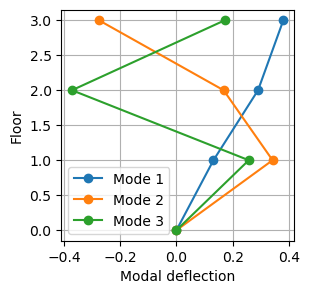

In [3]:
plt.figure(figsize=(3,3))

# Plot all 3 modes
for i in np.arange(3):

    phi_plot=np.append(0,Phi[:,i]) # Add zero to base of structure
    plt.plot(phi_plot,[0,1,2,3],marker='o',label='Mode ' + str(i+1))

plt.ylabel('Floor')
plt.xlabel('Modal deflection')
plt.legend()
plt.grid()


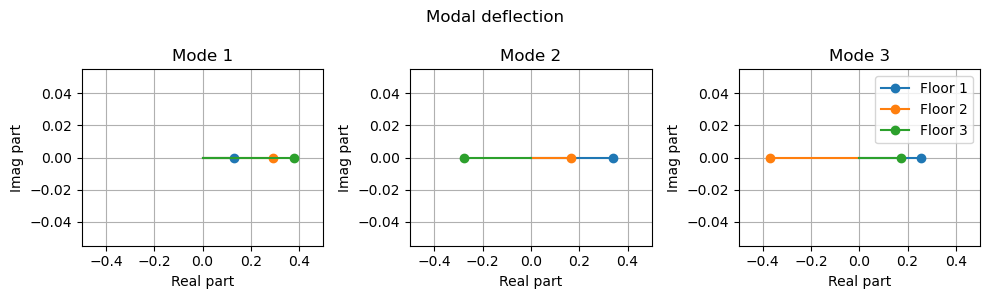

In [4]:
# Plot
fig, axs = plt.subplots(1, 3,figsize=(10, 3))

for k in np.arange(3):
    for n in np.arange(3):
        axs[k].plot([0, np.real(Phi[n,k])],[0, np.imag(Phi[n,k])],marker='o',label='Floor ' + str(n+1), markevery=[-1])
        axs[k].set_xlabel('Real part')
        axs[k].set_ylabel('Imag part')
        axs[k].set_xlim(-0.5,0.5)
        axs[k].grid(True)
        axs[k].set_title('Mode ' + str(k+1))
        
fig.suptitle('Modal deflection')
plt.tight_layout()
plt.legend()

Since the mode shapes from the undamped eigenvalue problem are real, their points lie on a straight line.

**b)**

The dashpot damper is lumped directly into the first floor:

$$
\mathbf{C}  = \begin{bmatrix}
c  & 0 & 0 \\
0  & 0 & 0 \\
0  & 0 & 0 \\
\end{bmatrix}
$$

**c**)

We solve the state space eigenvalue problem.





In [5]:
# Damping matrix
c1=30.0
C=np.zeros_like(K)
C[0,0]=c1

# State-space A-matrix
A = np.block([
    [np.zeros_like(M), np.eye(M.shape[0])],
    [-np.linalg.inv(M) @ K, -np.linalg.inv(M) @ C]
])

# State-space B-matrix
B = np.block([
    [np.zeros_like(M)],
    [np.linalg.inv(M)]
])

# Solve eigenvalue problem of A-matrix
lamb,psi=spla.eig(A)

idx_sort=np.argsort(np.abs(lamb)) # Find sorting order (smallest to biggest frequency)

lamb=lamb[idx_sort] # Rearrange eigenvalues
psi=psi[:,idx_sort] # Rearrange eigenvectors

omega_n_ss=np.abs(lamb) # Natural frequencies
xi_ss=-np.real(lamb)/np.abs(lamb) # Damping ratios

print('Eigenvalues:')
print(lamb)

print(' ')

print('Natural frequencies in rad/s:')
print(omega_n_ss)

print(' ')

print('Damping ratios in %:')
print(xi_ss*100)


Eigenvalues:
[-0.25931494-10.8902435j  -0.25931494+10.8902435j
 -1.77889012-28.38452135j -1.77889012+28.38452135j
 -0.96179495+39.52060587j -0.96179495-39.52060587j]
 
Natural frequencies in rad/s:
[10.89333042 10.89333042 28.44020925 28.44020925 39.53230752 39.53230752]
 
Damping ratios in %:
[2.3804927  2.3804927  6.25484187 6.25484187 2.43293399 2.43293399]



The eigenvalues come in complex conjugate pairs:

$$
\lambda =\{ \lambda_1, \bar{\lambda}_1,\lambda_2, \bar{\lambda}_2,\lambda_3, \bar{\lambda}_3 \}
$$

The natural frequencies and damping ratios will therefore be repeated twice.

The corresponding eigenvectors of $\mathbf{A}$ have a similar structure:

$$
\mathbf{\Psi} =
\{
\begin{bmatrix}
\boldsymbol{\phi}_1 \\
\lambda_1 \boldsymbol{\phi}_1
\end{bmatrix}
,
\begin{bmatrix}
\boldsymbol{\bar{\phi}}_1 \\
\bar{\lambda}_1 \boldsymbol{\bar{\phi}}_1
\end{bmatrix}
,
\begin{bmatrix}
\boldsymbol{\phi}_2 \\
\lambda_2 \boldsymbol{\phi}_2
\end{bmatrix}
,
\begin{bmatrix}
\boldsymbol{\bar{\phi}}_2 \\
\bar{\lambda}_2 \boldsymbol{\bar{\phi}}_2
\end{bmatrix}
,
\begin{bmatrix}
\boldsymbol{\phi}_3 \\
\lambda_3 \boldsymbol{\phi}_3
\end{bmatrix}
,
\begin{bmatrix}
\boldsymbol{\bar{\phi}}_3 \\
\bar{\lambda}_3 \boldsymbol{\bar{\phi}}_3
\end{bmatrix}
\}
$$

To obtain the mode shapes $\boldsymbol{\phi}_1$, $\boldsymbol{\phi}_2$, and $\boldsymbol{\phi}_3$, we pick the upper half of the eigenvectors, and select every other column. These modes will be complex, and we can plot them in the complex plane.


Mode shapes:
[[-0.34411209-0.03673433j -0.99804193-0.06254842j -0.65736264-0.16969606j]
 [-0.76245458-0.02945453j -0.47695051+0.14375207j  0.999704  -0.02432934j]
 [-0.99971662-0.02380493j  0.78062845+0.02299517j -0.46791085+0.04499343j]]


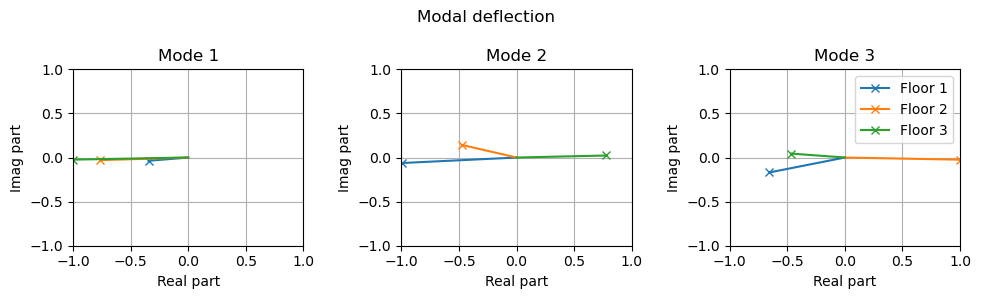

In [6]:
# Plot

phi_plot=psi[0:3,0::2] # Select the upper half and every other column
phi_plot=phi_plot*np.exp(1j*np.pi/2) # Rotate by 90 degrees  
phi_plot = phi_plot / np.max(np.abs(phi_plot), axis=0)  # Scale maximum to 1

print('Mode shapes:')
print(phi_plot)

fig, axs = plt.subplots(1, 3,figsize=(10, 3))

for k in np.arange(3):
    for n in np.arange(3):
        axs[k].plot([0, np.real(phi_plot[n,k])],[0, np.imag(phi_plot[n,k])],marker='x',label='Floor ' + str(n+1), markevery=[-1])
        axs[k].set_xlabel('Real part')
        axs[k].set_ylabel('Imag part')
        axs[k].set_xlim(-1,1)
        axs[k].set_ylim(-1,1)
        axs[k].grid(True)
        axs[k].set_title('Mode ' + str(k+1))
        
fig.suptitle('Modal deflection')
plt.tight_layout()
plt.legend()

We have rotated the mode shapes by 90 (multiplied by $\exp(i\cdot\pi /2)$). This is valid since an eigenvector can always be scaled, even with an complex number.

The resulting mode shapes appear similar to those from the undamped eigenvalue problem but now exhibit slight complexity, meaning they no longer lie on a straight line. This indicates small phase differences between points in the mode shapes. In an undamped system, the mode shapes are purely real, and all points oscillate in sync. However, with damping, these points oscillate slightly out of phase, introducing complex components to the mode shapes.

If we instead plotted the conjugates, $\boldsymbol{\bar{\phi}}_1$, $\boldsymbol{\bar{\phi}}_2$, and $\boldsymbol{\bar{\phi}}_3$, the result would be the same except that the imaginary part would be mirrored. This conjugate property is important: for a structure, the total response will be real since the imaginary part of the response will cancel out.


**d)**

domega is 0.12566370614359174


Text(0.5, 1.0, 'Response')

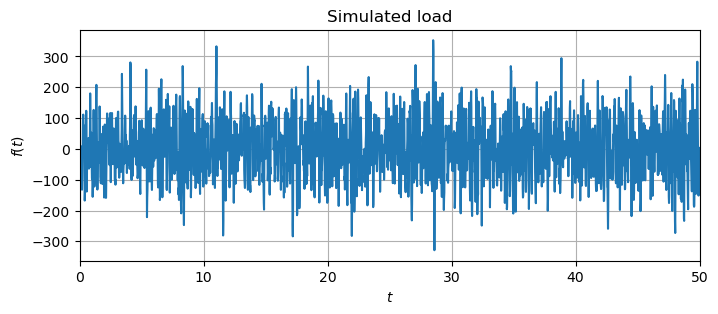

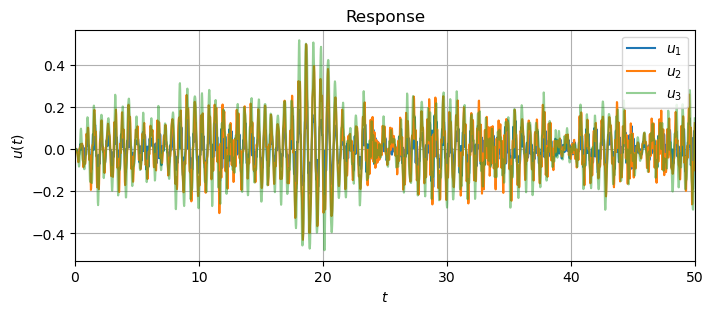

In [7]:

dt=0.02 # Time step

# Convert state-space matrix to discrete time
A_d = scipy.linalg.expm(A * dt)
B_d = np.dot( scipy.linalg.expm(A * dt) - np.eye(A.shape[0]), np.linalg.inv(A)) @ B

T=50

N=int(T/dt)

t=np.arange(0,N,1)*dt # Time axis

domega=2*np.pi/T # Frequency spacing
print('domega is ' + str(domega))

omega = np.arange(0,N,1)*domega # Frequency axis

alpha0 = 10.0
omega0 =  5*2*np.pi
Sx = 10000/np.pi*alpha0/(alpha0**2+(omega-omega0)**2) # Load spectrum

# Generate f
phi = np.random.rand(N)*2*np.pi # Random phase angles 
c = (2*Sx*domega)**0.5*np.exp(1j*phi) # The complex amplitude including the phase angle
f = np.real(np.fft.ifft(c)*N) # The IFFT

plt.figure(figsize=(8,3))
plt.plot(t,f)
plt.ylabel('$f(t)$')
plt.xlabel('$t$')
plt.xlim(0,50)
plt.grid()
plt.title('Simulated load')

x=np.zeros((6,len(t))) # State vector

# Discrete time forward model
for k in np.arange(len(t)-1):

    fk=np.zeros((3,1))
    fk[1]=f[k]
    x[:, k+1] = A_d @ x[:, k] +  B_d @ fk.flatten()

# Plot DOF 1-3
plt.figure(figsize=(8,3))
plt.plot(t,x[0,:],label='$u_1$')
plt.plot(t,x[1,:],label='$u_2$')
plt.plot(t,x[2,:],label='$u_3$',alpha=0.5)
plt.ylabel('$u(t)$')
plt.xlabel('$t$')
plt.xlim(0,50)
plt.legend()
plt.grid()
plt.title('Response')


**e)**

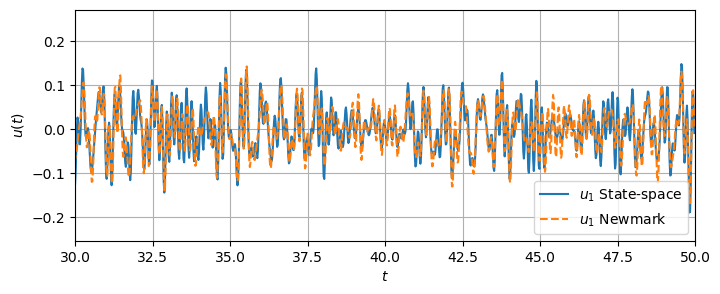

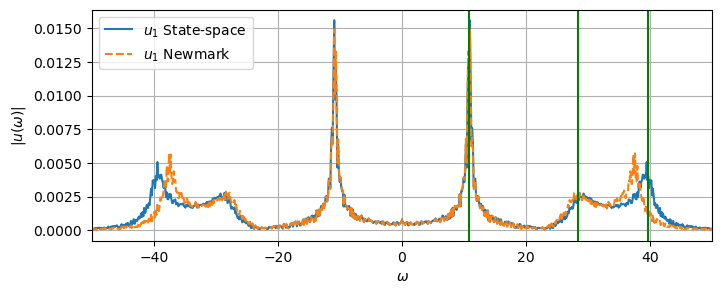

In [8]:
import sys
sys.path.append('./../../modules')
from time_integration import * # Import all functions in the module time_integration

u0 = np.zeros((3,1))
udot0 = np.zeros((3,1))

u,_,_ = linear_newmark_krenk(M,C,K,np.vstack((f*0,f,f*0)),u0,udot0,dt)

# Plot time series
plt.figure(figsize=(8,3))
plt.plot(t,x[0,:],label='$u_1$ State-space')
plt.plot(t,u[0,:],'--',label='$u_1$ Newmark')
plt.ylabel('$u(t)$')
plt.xlabel('$t$')
plt.xlim(30,50)
plt.legend()
plt.grid()

x_ss_fft = np.fft.fft(x[0,:])/N # DFT
x_ss_fft = np.fft.fftshift(x_ss_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

u_newmark_fft = np.fft.fft(u[0,:])/N # DFT
u_newmark_fft = np.fft.fftshift(u_newmark_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

f_fft = np.fft.fftfreq(N, d=dt) # Frequency axis in Hz
f_fft_shift = np.fft.fftshift(f_fft)
omega_fft_shift=f_fft_shift*2*np.pi # Convert to rad/s

# Plot FFT
plt.figure(figsize=(8,3))
plt.plot(omega_fft_shift,np.abs(x_ss_fft),label='$u_1$ State-space')
plt.plot(omega_fft_shift,np.abs(u_newmark_fft),'--',label='$u_1$ Newmark')
plt.ylabel('$|u({\omega})|$')
plt.xlabel('$\omega$')
plt.xlim(-50,50)
plt.legend()
plt.grid()
plt.axvline(omega_n[0],color='g')
plt.axvline(omega_n[1],color='g')
plt.axvline(omega_n[2],color='g')

We observe a small difference between the two numerical integration methods. In particular, the green lines, indicating the natural frequencies, show that Newmark solution suffers from a frequency shift (period elongation). This shift suggests that Newmark's method introduces slight inaccuracies in capturing the true frequencies of the system, particularly in higher modes.

The highest mode is $\omega_3=39$ rad/s, which has a natural period of $T_3=0.16$ s. The time step is  $\Delta t=0.02$ s, which means there are 8 points per vibration cycle. However, it is generally recommended to sample well above $10-20$ points per cycle for accurate results. As the lower modes have a much longer natural period, they are less affected by this issue.

This example illustrates that no numerical integration method produces an exact solution: each method has its own limitations and introduces some level of approximation. Therefore, applying appropriate settings is necessary. In this case,  reducing the time step to  $\Delta t=0.01$ s  would  improve the accuracy of the Newmark method by better resolving the higher-frequency modes.


### Problem 2: Beam with damper

**a**)




Natural frequencies in rad/s:
[   7.80266001   31.21376982   70.26099078  125.04854726  195.83508663
  283.12459676  387.74841475  510.87067438  653.39070626  866.02540378
 1025.5539218  1250.10429505 1513.1783856  1820.13595271 2176.82606006
 2585.11506058 3033.48354659 3479.32653458 3831.09791724 3968.6269666 ]


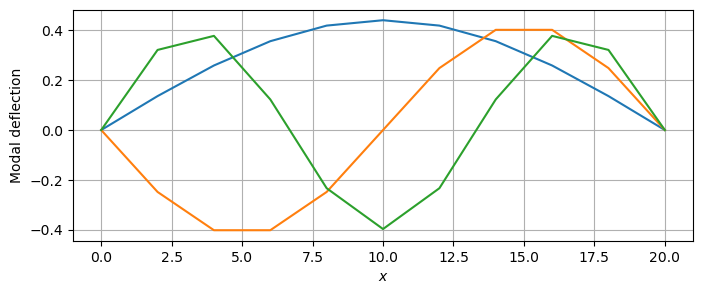

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import scipy
import sys

m=1000
EI=1e8
L=2 # Length of each element

# Element matrices
k_el = (EI / L**3) * np.array([[12,  6*L,  -12,  6*L],
                               [6*L,  4*L**2, -6*L,  2*L**2],
                               [-12, -6*L,  12, -6*L],
                               [6*L,  2*L**2, -6*L,  4*L**2]])

m_el = (m*L / 420) * np.array([[156,  22*L,   54,  -13*L],
                             [22*L,  4*L**2,  13*L, -3*L**2],
                             [54,  13*L,  156, -22*L],
                             [-13*L, -3*L**2, -22*L,  4*L**2]])
ndof=11*2

K=np.zeros((ndof,ndof))
M=np.zeros((ndof,ndof))

for idx_el in np.arange(0,10,1):

    idx_dof = np.arange(0, 4) + (idx_el) * 2 # Index of 4 DOFs for this element
    K[np.ix_(idx_dof, idx_dof)] += k_el  # Assemble element stiffness into global stiffness matrix
    M[np.ix_(idx_dof, idx_dof)] += m_el  # Assemble element mass into global mass matrix
    

# Define the DOFs that are free
free_dofs = np.delete(np.arange(ndof), [0, 20])  # DOFs 1 (index 0) and 21 (index 20) are zero

# Transformation matrix T_bc (ndof*reduced_dof), which maps from reduced to full DOFs
T_bc = np.zeros((ndof, len(free_dofs)))

# Fill the transformation matrix
for i, dof in enumerate(free_dofs):
    T_bc[dof, i] = 1

M_bc=T_bc.T @ M @ T_bc
K_bc=T_bc.T @ K @ T_bc

# Natural frequencies and modes
lam,vec = spla.eig(K_bc,M_bc)
idx_sort = np.argsort(np.abs(lam)) # Sorting order (small to big)

lam = lam[idx_sort]
phi_bc = vec[:,idx_sort] # Modes
omega_n = np.real(lam**0.5) # Natural frequencies

print('Natural frequencies in rad/s:')
print(omega_n)

phi=T_bc@phi_bc # Recalculate mode shapes, including the constrained DOF

# Plot 3 modes
plt.figure(figsize=(8,3))
for idx in np.arange(0,3):
    plt.plot(np.linspace(0,20,11),phi[0::2,idx])
plt.ylabel('Modal deflection')
plt.xlabel('$x$')
plt.grid()


**b**)

In [10]:
# Damping matrix
c=2e4
C=np.zeros_like(K)
C[4,4]=c

C_bc=T_bc.T @ C @ T_bc

# State-space A-matrix
A = np.block([
    [np.zeros_like(M_bc), np.eye(M_bc.shape[0])],
    [-np.linalg.inv(M_bc) @ K_bc, -np.linalg.inv(M_bc) @ C_bc]
])

# State-space B-matrix
B = np.block([
    [np.zeros_like(M_bc)],
    [np.linalg.inv(M_bc)]
])

# Solve eigenvalue problem of A-matrix
lamb,psi=spla.eig(A)

idx_sort=np.argsort(np.abs(lamb)) # Find sorting order (smallest to biggest frequency)

lamb=lamb[idx_sort] # Rearrange frequencies
psi=psi[:,idx_sort] # Rearrange eigenvectors

omega_n_ss=np.abs(lamb)
xi_ss=-np.real(lamb)/np.abs(lamb)

print('Natural frequencies in rad/s:')
print(omega_n_ss)

print(' ')

print('Damping ratios in %:')
print(xi_ss*100)


Natural frequencies in rad/s:
[   7.80923193    7.80923193   31.20760118   31.20760118   70.22923079
   70.22923079  125.03556209  125.03556209  195.83508663  195.83508663
  283.12232103  283.12232103  387.74088912  387.74088912  510.85401399
  510.85401399  653.38253616  653.38253616  866.02540378  866.02540378
 1025.55207326 1025.55207326 1250.09856748 1250.09856748 1513.16979512
 1513.16979512 1820.132653   1820.132653   2176.82606006 2176.82606006
 2585.11372978 2585.11372978 3033.4810008  3033.4810008  3479.32495935
 3479.32495935 3831.09774346 3831.09774346 3968.6269666  3968.6269666 ]
 
Damping ratios in %:
[ 4.43053781e+00  4.43053781e+00  2.90317482e+00  2.90317482e+00
  1.28968340e+00  1.28968340e+00  2.77790518e-01  2.77790518e-01
 -1.95005136e-13 -1.95005136e-13  1.26034148e-01  1.26034148e-01
  2.47612690e-01  2.47612690e-01  1.96935861e-01  1.96935861e-01
  6.54148948e-02  6.54148948e-02  2.17565204e-14  2.17565204e-14
  2.74717981e-02  2.74717981e-02  6.66984835e-02  6.6

**c)** 

Proportional damping refers to a type of damping where $\mathbf{C}$ is assumed to be a linear combination of the mass matrix $\mathbf{M}$ and the stiffness matrix $\mathbf{K}$, such that:

$$
\mathbf{C} = \alpha_1 \mathbf{M} + \alpha_2 \mathbf{K}
$$

In the case of proportional damping, the mode shapes of the undamped system will also uncouple the damping matrix.

$$
\mathbf{\tilde{C}} = \mathbf{\Phi}^\text{T} \mathbf{C} \mathbf{\Phi}
$$

For the system under consideration, we don't have proportional damping. As will be shown in question e), even if the damping is not perfectly proportional, the off-diagonal terms of $\mathbf{\tilde{C}} $ are typically small.

**d)** 

Modal equation of motion:

$$
\mathbf{\tilde{M}} \mathbf{\ddot{z}}(t)+
\mathbf{\tilde{C}} \mathbf{\dot{z}}(t)+
\mathbf{\tilde{K}} \mathbf{{z}}(t)=
\mathbf{\Phi}^\text{T} \mathbf{f}(t)
$$

Multiply by the inverse modal mass matrix:

$$ \ddot{\mathbf{z}} + \mathbf{\tilde{M}}^{-1}\mathbf{\tilde{C}} \dot{\mathbf{z}} +\mathbf{\tilde{M}}^{-1} \mathbf{\tilde{K}} \mathbf{z} = \mathbf{\tilde{M}}^{-1} \mathbf{\Phi}^\text{T} \mathbf{f}(t) $$

The system can be formulated on (modal) state space form:

$$ \left[ \begin{array}{c} \dot{\mathbf{z}}\\ \ddot{\mathbf{z}} \end{array} \right] =
\left[ \begin{array}{c} \mathbf{0}& \mathbf{I} \\ -\mathbf{\tilde{M}}^{-1}  \mathbf{\tilde{K}} & -\mathbf{\tilde{M}}^{-1} \mathbf{\tilde{C}} \end{array} \right] 
\underbrace{ \left[ \begin{array}{c} \mathbf{z}\\ \dot{\mathbf{z}} \end{array} \right]  }_{\text{Modal state}}
+
 \left[ \begin{array}{c} \mathbf{0}\\ \mathbf{\tilde{M}}^{-1}  \end{array} \right]
\underbrace{ \mathbf{\Phi}^\text{T} \mathbf{f}(t) }_{\text{Modal load}}
$$



**e)** 


domega is 0.06283185307179587


Text(0.5, 1.0, 'Load spectrum')

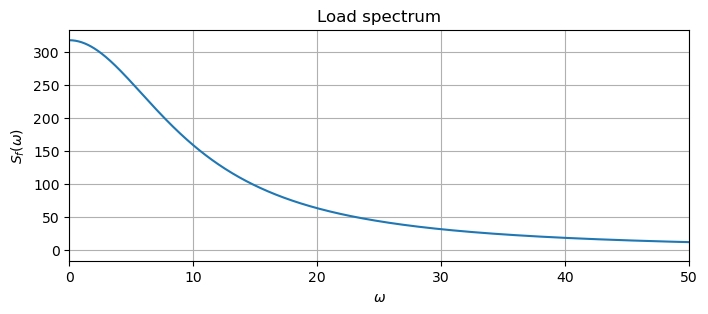

In [11]:
dt=0.001

T=100

N=int(T/dt)

t=np.arange(0,N,1)*dt # Time axis

domega=2*np.pi/T # Frequency spacing
print('domega is ' + str(domega))

omega = np.arange(0,N,1)*domega # Frequency axis

alpha = 10.0
Sf = 100**2*2*alpha/(2*np.pi)*1/(alpha**2+omega**2) # Load spectrum

# Plot
plt.figure(figsize=(8,3))
plt.plot(omega,Sf)
plt.ylabel('$S_f(\omega)$')
plt.xlabel('$\omega$')
plt.xlim(0,50)
plt.grid()
plt.title('Load spectrum')


Text(0.5, 1.0, 'Simulated load')

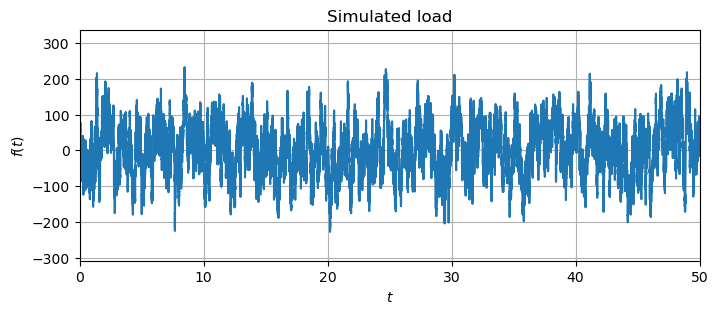

In [12]:
# Generate load
phi_angle = np.random.rand(N)*2*np.pi # Random phase angles 
c = (2*Sf*domega)**0.5*np.exp(1j*phi_angle) # The complex amplitude including the phase angle
f = np.real(np.fft.ifft(c)*N) # The IFFT

# Plot
plt.figure(figsize=(8,3))
plt.plot(t,f)
plt.ylabel('$f(t)$')
plt.xlabel('$t$')
plt.xlim(0,50)
plt.grid()
plt.title('Simulated load')


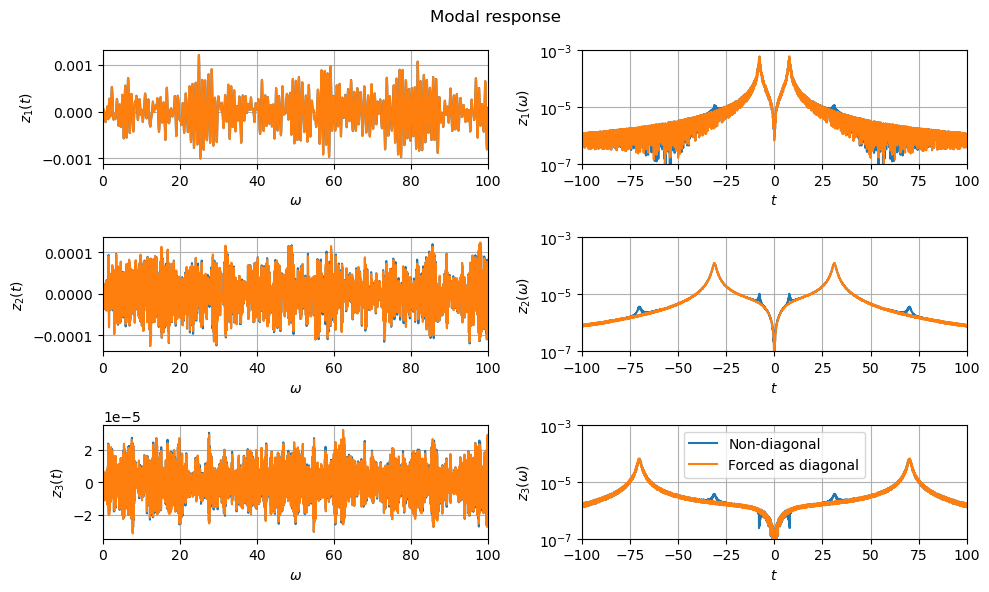

In [13]:
modes=[0,1,2] # Select the first three modes

Mg=phi_bc[:,modes].T @ M_bc @ phi_bc[:,modes]
Cg=phi_bc[:,modes].T @ C_bc @ phi_bc[:,modes]
Kg=phi_bc[:,modes].T @ K_bc @ phi_bc[:,modes]

# State-space A-matrix
A = np.block([
    [np.zeros_like(Mg), np.eye(Mg.shape[0])],
    [-np.linalg.inv(Mg) @ Kg, -np.linalg.inv(Mg) @ Cg]
])

# State-space B-matrix
B = np.block([
    [np.zeros_like(Mg)],
    [np.linalg.inv(Mg)]
])

# Make a diagonal-only generalized damping
Cg_dia=np.diag(np.diag(Cg))

# State-space A-matrix
A_dia = np.block([
    [np.zeros_like(Mg), np.eye(Mg.shape[0])],
    [-np.linalg.inv(Mg) @ Kg, -np.linalg.inv(Mg) @ Cg_dia]
])

# State-space B-matrix
B_dia = np.block([
    [np.zeros_like(Mg)],
    [np.linalg.inv(Mg)]
])

# Convert state-space matrix to discrete time
A_d = scipy.linalg.expm(A * dt)
B_d = (A_d - np.eye(A.shape[0])) @ np.linalg.inv(A) @ B

A_d_dia = scipy.linalg.expm(A_dia * dt)
B_d_dia = (A_d_dia - np.eye(A_dia.shape[0])) @ np.linalg.inv(A_dia) @ B_dia

# State vectors
x=np.zeros((3*2,len(t)))
x_dia=np.zeros((3*2,len(t)))

# Discrete time forward model
for k in np.arange(len(t)-1):

    fk=np.zeros((22,1)) # Force vector
    fk[16]=f[k] # Assign force to DOF 17 (at load)
    
    fk_modal=phi[:,modes].T @ fk # Modal force vector

    # Propagate model one step forward
    x[:, k+1] = A_d @ x[:, k] + B_d @ fk_modal.flatten()
    
    # Propagate model one step forward
    x_dia[:, k+1] = A_d_dia @ x_dia[:, k] + B_d_dia @ fk_modal.flatten()
    

# Calcualte FFT of time series
x_fft = np.fft.fft(x,axis=1)/N # DFT
x_fft = np.fft.fftshift(x_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

x_dia_fft = np.fft.fft(x_dia,axis=1)/N # DFT
x_dia_fft = np.fft.fftshift(x_dia_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

f_fft = np.fft.fftfreq(N, d=dt) # Frequency axis in Hz
f_fft_shift = np.fft.fftshift(f_fft)
omega_fft_shift=f_fft_shift*2*np.pi # Convert to rad/s
    
# Plot
fig, axs = plt.subplots(3, 2,figsize=(10, 6))

for i in np.arange(3):
    axs[i,0].plot(t,x[i,:],label='Non-diagonal')
    axs[i,0].plot(t,x_dia[i,:],label='Forced as diagonal')
    axs[i,0].set_xlabel(r'$\omega$')
    axs[i,0].set_ylabel(r'$z_' + str(i+1) +  '(t)$')
    axs[i,0].set_xlim(0,T)
    axs[i,0].grid(True)
    
    axs[i,1].plot(omega_fft_shift,np.abs(x_fft[i,:]),label='Non-diagonal')
    axs[i,1].plot(omega_fft_shift,np.abs(x_dia_fft[i,:]),label='Forced as diagonal')
    axs[i,1].set_xlabel(r'$t$')
    axs[i,1].set_ylabel(r'$z_' + str(i+1) +  '(\omega)$')
    axs[i,1].set_xlim(-100,100)
    axs[i,1].grid(True)    
    axs[i,1].set_ylim(1e-7,1e-3)

    axs[i,1].set_yscale('log')    
    
plt.legend()
fig.suptitle('Modal response')
plt.tight_layout()



For case *ii*), where $\mathbf{\tilde{C}}$ is forced to be diagonal, each mode has a peak at its own natural frequency. For case *i)*, we observe that each mode peaks at its own natural frequency but also has small peaks or dips at the frequencies of the other modes. This is because of the non-proportional damping in a system. There is a coupling between the modes since $\mathbf{\tilde{C}}=\mathbf{\Phi}^\text{T} \mathbf{C} \mathbf{\Phi} $ is not diagonal.

Since $\mathbf{\Phi}$ from the undamped eigenvalue problem formally does not uncouple the system, we may say that  $z_1(t)$, $z_2(t)$, and $z_3(t)$ technically are not normal modes, but generalized degrees of freedom that still retains a small amount of coupling.

If we plot the displacement response, we do see that the assumption of proportional damping is quite good: the responses for the two cases are quite similar.


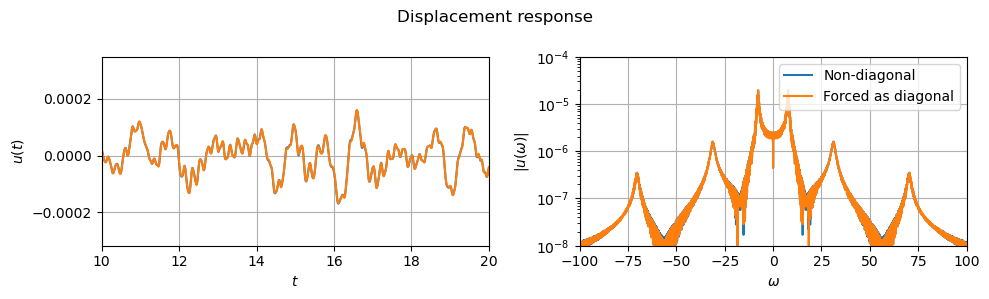

In [14]:
# Response (vertical displacement) at DOF 17 (at load)
u = phi[16,modes] @ x[0:3,:]
u_dia = phi[16,modes] @ x_dia[0:3,:]

u_fft = np.fft.fft(u)/N # DFT
u_fft = np.fft.fftshift(u_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

u_dia_fft = np.fft.fft(u_dia)/N # DFT
u_dia_fft = np.fft.fftshift(u_dia_fft) # Shift elements in vector, goes from [-omega,...,0,...+omega]

f_fft = np.fft.fftfreq(N, d=dt) # Frequency axis in Hz
f_fft_shift = np.fft.fftshift(f_fft)
omega_fft_shift=f_fft_shift*2*np.pi # Convert to rad/s

# Plot
fig, axs = plt.subplots(1, 2,figsize=(10, 3))

axs[0].plot(t,u,label='Non-diagonal')
axs[0].plot(t,u_dia,label='Forced as diagonal')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$u(t)$')
axs[0].set_xlim(0,T)
axs[0].set_xlim(10,20)
axs[0].grid(True)

axs[1].plot(omega_fft_shift,np.abs(u_fft),label='Non-diagonal')
axs[1].plot(omega_fft_shift,np.abs(u_dia_fft),label='Forced as diagonal')
axs[1].set_xlabel(r'$\omega$')
axs[1].set_ylabel(r'$|u(\omega)|$')
axs[1].set_xlim(-100,100)
axs[1].set_ylim(1e-8,1e-4)
axs[1].grid(True)    
axs[1].set_yscale('log')    

plt.legend()
fig.suptitle('Displacement response')
plt.tight_layout()

**f)**

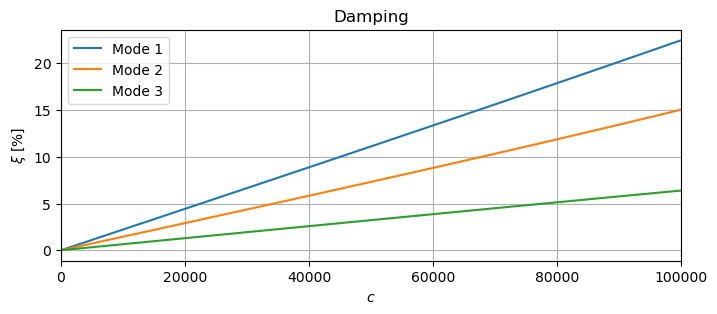

In [15]:

c_all=np.linspace(0,1e5,100)

xi_ss_all=np.zeros((M_bc.shape[0]*2,len(c_all)))
omega_n_ss_all=np.zeros((M_bc.shape[0]*2,len(c_all)))
 
for idx in np.arange(len(c_all)):

    # Define damping matrix
    C=np.zeros_like(K)
    C[4,4]=c_all[idx]
    C_bc=T_bc.T@C@T_bc
    
    # State-space A-matrix
    A = np.block([
        [np.zeros_like(M_bc), np.eye(M_bc.shape[0])],
        [-np.linalg.inv(M_bc) @ K_bc, -np.linalg.inv(M_bc) @ C_bc]
    ])
    
    # Solve eigenvalue problem of A-matrix
    lamb,psi=spla.eig(A)
    
    omega_n_ss=np.abs(lamb)
    xi_ss=-np.real(lamb)/np.abs(lamb)
    
    xi_ss_all[:,idx]=xi_ss
    omega_n_ss_all[:,idx]=omega_n_ss

plt.figure(figsize=(8,3))
plt.plot(c_all,xi_ss_all[-1,:]*100,label='Mode 1')
plt.plot(c_all,xi_ss_all[-3,:]*100,label='Mode 2')
plt.plot(c_all,xi_ss_all[-5,:]*100,label='Mode 3')
plt.ylabel(r'$\xi$ [%]')
plt.xlabel('$c$')
plt.xlim(0,1e5)
plt.grid()
plt.title('Damping')
plt.legend()
